In [1]:
import sys
sys.path.insert(0, '../')
from lib import *

%matplotlib inline

DEBUG = False;

PEs={}

# Raw

## OV 9

In [2]:
# WEEK="APSAIA_VUV_2";
WEEK="DAPHNE_VUV";
# WEEK="DAPHNE_VIS";
compress=False

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")
OV=9

Runs=Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]
Runs.iloc[1]

Run                                                              3
Channels                                           [0, 1, 3, 4, 5]
Polarity                        {0: -1, 1: -1, 3: -1, 4: -1, 5: 1}
Type                                                         Alpha
ChannelName         [SiPM289, SiPM290, SiPM377, SiPM378, XARAPUCA]
OverVoltageSiPMs                                                 4
OverVoltageXA                                                    9
Threshold                                                      NaN
Nev                                                          30001
Duration                                                   988.504
Rate                                                       30.3499
Date                                           1969-12-31 18:00:45
Name: 3, dtype: object

ChargeRange
ChargePeakRange
ChargeRangeAverageWvf
ChargeRangeRelativeAmp
ChargeRangePed
PeakFinderInRange


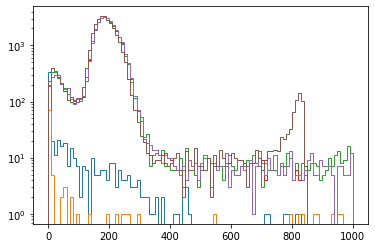

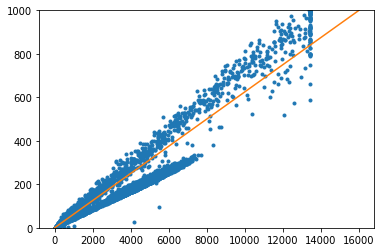

In [3]:
ADCsxticks=GetGains(WEEK,OV)[-1]

for ch, run in [(5,3)]:
        run_path=path+"run"+str(run).zfill(2)+"/";
        Charge_vars  =open_ch_var(run_path ,"Charge_vars" ,ch,compressed=compress)
        Peak_vars    =open_ch_var(run_path ,"Peak_vars" ,ch,compressed=compress)

for charge in Charge_vars.keys():
    print(charge)
    
    plt.hist(Charge_vars[charge]*ADCsxticks,bins=100,range=(0,1000),histtype="step",label=charge)
    plt.semilogy()
plt.figure()
plt.plot(Peak_vars["Peak"],Charge_vars["ChargeRangeRelativeAmp"]*ADCsxticks,'.');
plt.ylim(0,1000)
plt.plot([0,16000],[0,1000])


{'OV_9': 195.02596914679384}


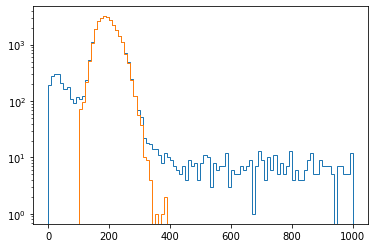

In [4]:
AMP_CUT=(Peak_vars["Peak"]>1000) * (Peak_vars["Peak"]<8e3)
CHARGE_CUT=(Charge_vars["ChargeRangeRelativeAmp"]*ADCsxticks)>100
AMP_CHARGE_CUT=((1/16)*Peak_vars["Peak"])>(Charge_vars["ChargeRangeRelativeAmp"]*ADCsxticks)

plt.hist(Charge_vars["ChargeRangeRelativeAmp"]*ADCsxticks,bins=100,range=(0,1000),histtype="step",label=charge);
plt.hist(Charge_vars["ChargeRangeRelativeAmp"][AMP_CUT*AMP_CHARGE_CUT*CHARGE_CUT]*ADCsxticks,bins=100,range=(0,1000),histtype="step",label=charge);
plt.semilogy()

PEs["OV_"+str(OV)]=np.mean(Charge_vars["ChargeRangeRelativeAmp"][AMP_CUT*AMP_CHARGE_CUT*CHARGE_CUT]*ADCsxticks)
print(PEs)

## OV 12

In [5]:
# WEEK="APSAIA_VUV_2";
WEEK="DAPHNE_VUV";
# WEEK="DAPHNE_VIS";

OV=12

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")

Runs=Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]
Runs.iloc[1]

Run                                                              5
Channels                                           [0, 1, 3, 4, 5]
Polarity                        {0: -1, 1: -1, 3: -1, 4: -1, 5: 1}
Type                                                         Alpha
ChannelName         [SiPM289, SiPM290, SiPM377, SiPM378, XARAPUCA]
OverVoltageSiPMs                                                 4
OverVoltageXA                                                   12
Threshold                                                      NaN
Nev                                                          30001
Duration                                                   988.186
Rate                                                       30.3597
Date                                           1969-12-31 18:00:45
Name: 5, dtype: object

ChargeRange
ChargePeakRange
ChargeRangeAverageWvf
ChargeRangeRelativeAmp
ChargeRangePed
PeakFinderInRange


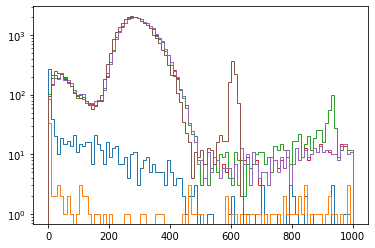

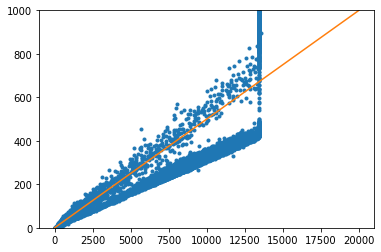

In [6]:
ADCsxticks=GetGains(WEEK,OV)[-1]

for ch, run in [(5,5)]:
        run_path=path+"run"+str(run).zfill(2)+"/";
        compress=False
        Charge_vars  =open_ch_var(run_path ,"Charge_vars" ,ch,compressed=compress)
        Peak_vars    =open_ch_var(run_path ,"Peak_vars" ,ch,compressed=compress)

for charge in Charge_vars.keys():
    print(charge)
    
    plt.hist(Charge_vars[charge]*ADCsxticks,bins=100,range=(0,1000),histtype="step",label=charge)
    plt.semilogy()
plt.figure()
plt.plot(Peak_vars["Peak"],Charge_vars["ChargeRangeRelativeAmp"]*ADCsxticks,'.');
plt.ylim(0,1000)
plt.plot([0,20000],[0,1000])


{'OV_9': 195.02596914679384, 'OV_12': 301.0118270694184}


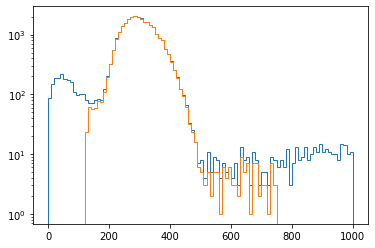

In [7]:
AMP_CUT=(Peak_vars["Peak"]>1000) * (Peak_vars["Peak"]<15e3)
CHARGE_CUT=(Charge_vars["ChargeRangeRelativeAmp"]*ADCsxticks)>125
AMP_CHARGE_CUT=((1/18)*Peak_vars["Peak"])>(Charge_vars["ChargeRangeRelativeAmp"]*ADCsxticks)

plt.hist(Charge_vars["ChargeRangeRelativeAmp"]*ADCsxticks,bins=100,range=(0,1000),histtype="step",label=charge);
plt.hist(Charge_vars["ChargeRangeRelativeAmp"][AMP_CUT*AMP_CHARGE_CUT*CHARGE_CUT]*ADCsxticks,bins=100,range=(0,1000),histtype="step",label=charge);
plt.semilogy()


PEs["OV_"+str(OV)]=np.mean(Charge_vars["ChargeRangeRelativeAmp"][AMP_CUT*AMP_CHARGE_CUT*CHARGE_CUT]*ADCsxticks)
print(PEs)

## OV 7

In [8]:
# WEEK="APSAIA_VUV_2";
WEEK="DAPHNE_VUV";
# WEEK="DAPHNE_VIS";

OV=7

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")

Runs=Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]
Runs.iloc[1]

Run                                                              1
Channels                                           [0, 1, 3, 4, 5]
Polarity                        {0: -1, 1: -1, 3: -1, 4: -1, 5: 1}
Type                                                         Alpha
ChannelName         [SiPM289, SiPM290, SiPM377, SiPM378, XARAPUCA]
OverVoltageSiPMs                                                 4
OverVoltageXA                                                    7
Threshold                                                      NaN
Nev                                                          30001
Duration                                                   826.565
Rate                                                        36.296
Date                                           1969-12-31 18:00:45
Name: 1, dtype: object

ChargeRange
ChargePeakRange
ChargeRangeAverageWvf
ChargeRangeRelativeAmp
ChargeRangePed
PeakFinderInRange


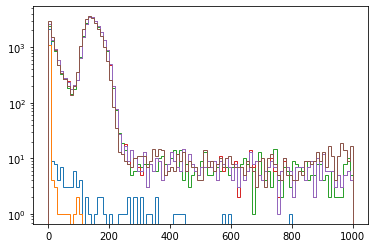

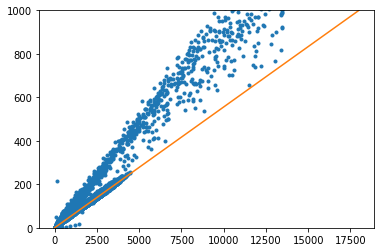

In [9]:
ADCsxticks=GetGains(WEEK,OV)[-1]

for ch, run in [(5,1)]:
        run_path=path+"run"+str(run).zfill(2)+"/";
        compress=False
        Charge_vars  =open_ch_var(run_path ,"Charge_vars" ,ch,compressed=compress)
        Peak_vars    =open_ch_var(run_path ,"Peak_vars" ,ch,compressed=compress)

for charge in Charge_vars.keys():
    print(charge)
    
    plt.hist(Charge_vars[charge]*ADCsxticks,bins=100,range=(0,1000),histtype="step",label=charge)
    plt.semilogy()
plt.figure()
plt.plot(Peak_vars["Peak"],Charge_vars["ChargeRangeRelativeAmp"]*ADCsxticks,'.');
plt.ylim(0,1000)
plt.plot([0,18000],[0,1000])


{'OV_9': 195.02596914679384, 'OV_12': 301.0118270694184, 'OV_7': 140.91785829601287}


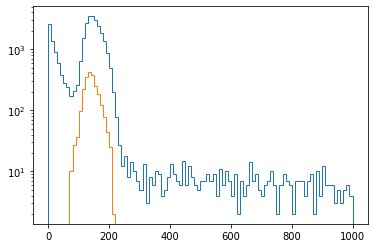

In [10]:
AMP_CUT=(Peak_vars["Peak"]>1000) * (Peak_vars["Peak"]<5e3)
CHARGE_CUT=(Charge_vars["ChargeRangeRelativeAmp"]*ADCsxticks)>70
AMP_CHARGE_CUT=((1/18)*Peak_vars["Peak"])>(Charge_vars["ChargeRangeRelativeAmp"]*ADCsxticks)

plt.hist(Charge_vars["ChargeRangeRelativeAmp"]*ADCsxticks,bins=100,range=(0,1000),histtype="step",label=charge);
plt.hist(Charge_vars["ChargeRangeRelativeAmp"][AMP_CUT*AMP_CHARGE_CUT*CHARGE_CUT]*ADCsxticks,bins=100,range=(0,1000),histtype="step",label=charge);
plt.semilogy()


PEs["OV_"+str(OV)]=np.mean(Charge_vars["ChargeRangeRelativeAmp"][AMP_CUT*AMP_CHARGE_CUT*CHARGE_CUT]*ADCsxticks)
print(PEs)

# Deconvolved 

## DAPHNE VUV

### 9 OV

In [113]:
WEEK="DAPHNE_VUV";
# WEEK="DAPHNE_VIS";
compress=False

OV=9

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")
OV=9
Light_run=Runs[(Runs["Type"]=="Visible") & ( Runs["OverVoltageXA"]==OV)].iloc[0] #1st run, lower intensity 
Calib_run=Runs[(Runs["Type"]=="Calibration") & ( Runs["OverVoltageXA"]==OV)].iloc[0] #1st run, lower intensity 

Runs=Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]

print(Runs.iloc[1])
print("\n")
print(Light_run)
print("\n")
print(Calib_run)



Run                                                              3
Channels                                           [0, 1, 3, 4, 5]
Polarity                        {0: -1, 1: -1, 3: -1, 4: -1, 5: 1}
Type                                                         Alpha
ChannelName         [SiPM289, SiPM290, SiPM377, SiPM378, XARAPUCA]
OverVoltageSiPMs                                                 4
OverVoltageXA                                                    9
Threshold                                                      NaN
Nev                                                          30001
Duration                                                   988.504
Rate                                                       30.3499
Date                                           1969-12-31 18:00:45
Name: 3, dtype: object


Run                                                             24
Channels                                           [0, 1, 3, 4, 5]
Polarity                        {0: -

1694.3102457176062
ChargeRangeAverageWvf
ChargeRangeAverageWvf
217.98215993779164


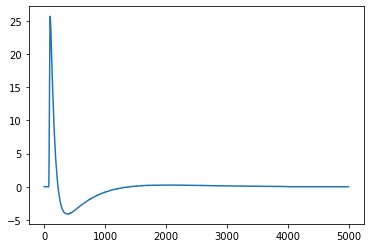

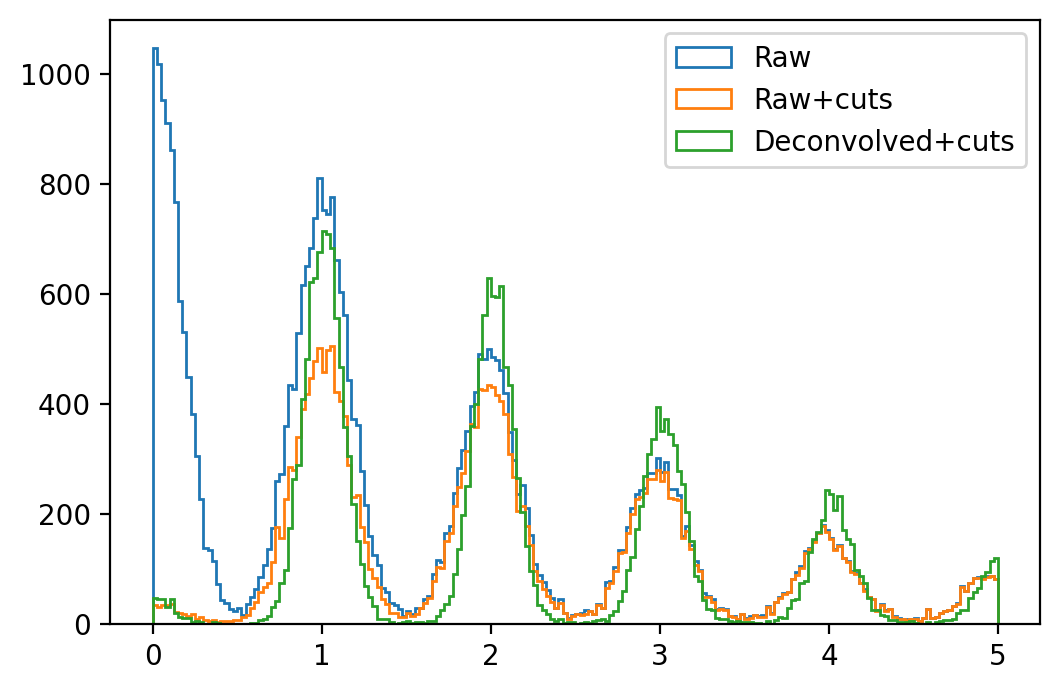

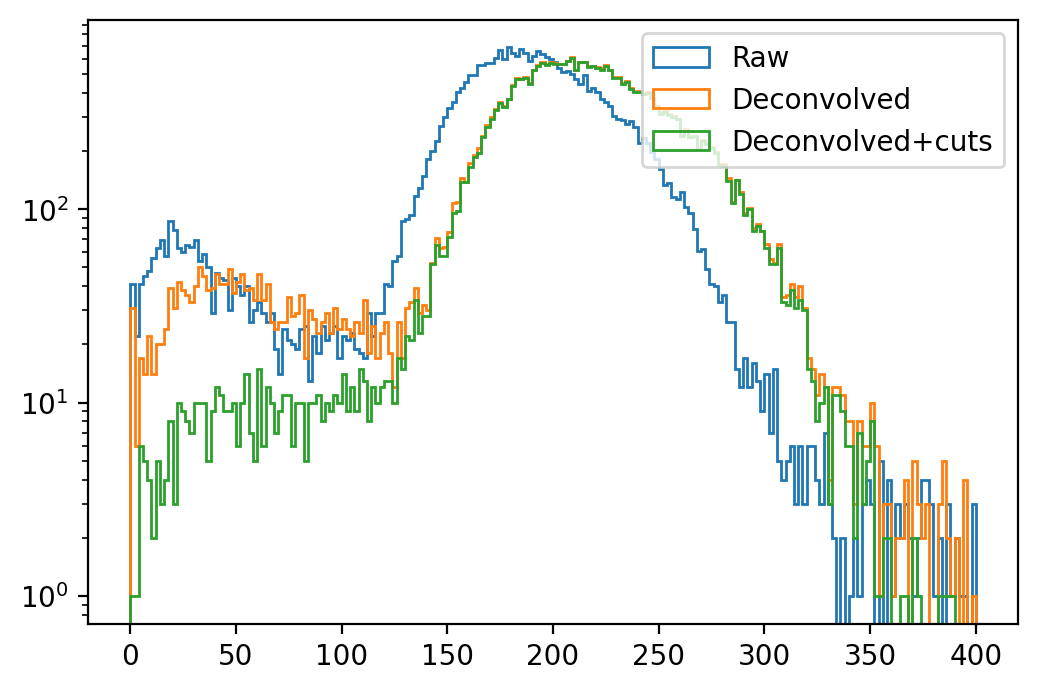

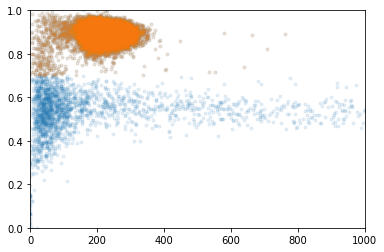

In [114]:
ADCsxticks2PE=GetGains(WEEK,OV)[-1]

#SER Template:
for ch, run in [(5,24)]:
    run_path=path+"run"+str(run).zfill(2)+"/";
    Average_waveform  =open_ch_var(run_path ,"Avg_wvf"   ,ch,compressed=compress)
    XA_SER=Average_waveform["AvWvf_Center_Peak"]
    
    #remove unphysical pretrigger
    presig=100
    XA_SER=np.concatenate([XA_SER[np.argmax(XA_SER)-presig:],np.zeros(XA_SER[:np.argmax(XA_SER)-presig].shape[0])])
    
    XA_SER/=np.sum(XA_SER[0:1000][XA_SER[0:1000]>0]) #normalize area to 1
    XA_SER*=1/ADCsxticks2PE #normalize area to 1 PE
    XA_SER_FFT  =np.fft.rfft(XA_SER) 
    gauss_F=gauss(np.arange(len(XA_SER_FFT)),sigma=30,n=2);

    if DEBUG:
        print(np.sum(XA_SER[0:1000][XA_SER[0:1000]>0]))
        plt.plot(XA_SER)

#Calibration check:
if DEBUG:
    for ch, run in [(5,7)]:
        run_path=path+"run"+str(run).zfill(2)+"/";
        Charge_vars   = open_ch_var(run_path ,"Charge_vars"   ,ch,compressed=compress)
        Peak_vars     = open_ch_var(run_path  ,"Peak_vars"   ,ch,compressed=compress)
        Pedestal_vars = open_ch_var(run_path  ,"Pedestal_vars_SW"   ,ch,compressed=compress)

        plt.figure(dpi=200)
        #plot charge distribution from raw calibration data
        for charge in ["ChargeRangeAverageWvf"]:
            print(charge)
        
            plt.hist(Charge_vars[charge]*ADCsxticks2PE,bins=200,range=(0,5),histtype="step",label="Raw")
            plt.hist(Charge_vars[charge][(Peak_vars["PeakTime"]>950)*(Peak_vars["PeakTime"]<1100)]*ADCsxticks2PE,bins=200,range=(0,5),histtype="step",label="Raw+cuts")

        # Compute same charge distribution from deconvolved data
        RawADC=open_ch_var(run_path,"RawADC",ch,compressed=True)
        ADC=substract_Pedestal((RawADC,Pedestal_vars,1))
        del RawADC
        ADC_dec=deconvolve(ADC,XA_SER,gauss_F)
        del ADC


        Pedestal_vars_SW=compute_Pedestal_slidingWindows(ADC_dec)
        ADC_dec=substract_Pedestal((ADC_dec,Pedestal_vars_SW,1))
        Charge_vars_dec =np.sum(ADC_dec[:,800:1200],axis=1)

        plt.hist(Charge_vars_dec [(Peak_vars["PeakTime"]>950)*(Peak_vars["PeakTime"]<1100)] ,bins=200,range=(0,5),histtype="step",label="Deconvolved+cuts")
        plt.legend()


# Alpha source analysis:
for ch, run in [(5,3)]:
    run_path=path+"run"+str(run).zfill(2)+"/";
    Charge_vars   = open_ch_var(run_path ,"Charge_vars"   ,ch,compressed=compress)
    Peak_vars     = open_ch_var(run_path  ,"Peak_vars"   ,ch,compressed=compress)
    Pedestal_vars = open_ch_var(run_path  ,"Pedestal_vars_SW"   ,ch,compressed=compress)

    plt.figure(dpi=200)
    #plot charge distribution from raw calibration data
    for charge in ["ChargeRangeAverageWvf"]:
        print(charge)
    
        plt.hist(Charge_vars[charge]*ADCsxticks2PE,bins=200,range=(0,400),histtype="step",label="Raw")

    # Compute same charge distribution from deconvolved data
    RawADC=open_ch_var(run_path,"RawADC",ch,compressed=True)
    ADC=substract_Pedestal((RawADC,Pedestal_vars,1))
    del RawADC
    ADC_dec=deconvolve(ADC,XA_SER,gauss_F)
    del ADC


    Pedestal_vars_SW=compute_Pedestal_slidingWindows(ADC_dec)
    ADC_dec=substract_Pedestal((ADC_dec,Pedestal_vars_SW,1))
    
    fast  = np.sum(ADC_dec[:,700:1000],axis=1)
    total = np.sum(ADC_dec[:,700:3000],axis=1)


f100=fast/total
f100_cut=(f100>0.7)*(f100<1)


plt.hist(total ,bins=200,range=(0,400),histtype="step",label="Deconvolved");
plt.hist(total[f100_cut] ,bins=200,range=(0,400),histtype="step",label="Deconvolved+cuts");
plt.legend()
plt.semilogy()

plt.figure()
plt.plot(total,fast/total,".",alpha=0.1)
plt.plot(total[f100_cut],(fast/total)[f100_cut],".",alpha=0.1)
plt.ylim(0,1)
plt.xlim(0,1e3)

print(np.mean(total[f100_cut]))

np.save("Alpha_spectrum_OV_"+str(OV)+".npy",total)


### OV 12

Run                                                              5
Channels                                           [0, 1, 3, 4, 5]
Polarity                        {0: -1, 1: -1, 3: -1, 4: -1, 5: 1}
Type                                                         Alpha
ChannelName         [SiPM289, SiPM290, SiPM377, SiPM378, XARAPUCA]
OverVoltageSiPMs                                                 4
OverVoltageXA                                                   12
Threshold                                                      NaN
Nev                                                          30001
Duration                                                   988.186
Rate                                                       30.3597
Date                                           1969-12-31 18:00:45
Name: 5, dtype: object


Run                                                             26
Channels                                           [0, 1, 3, 4, 5]
Polarity                        {0: -

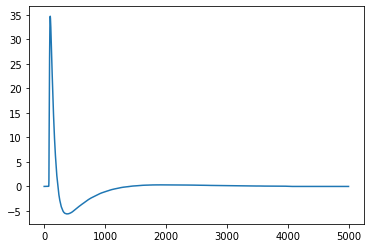

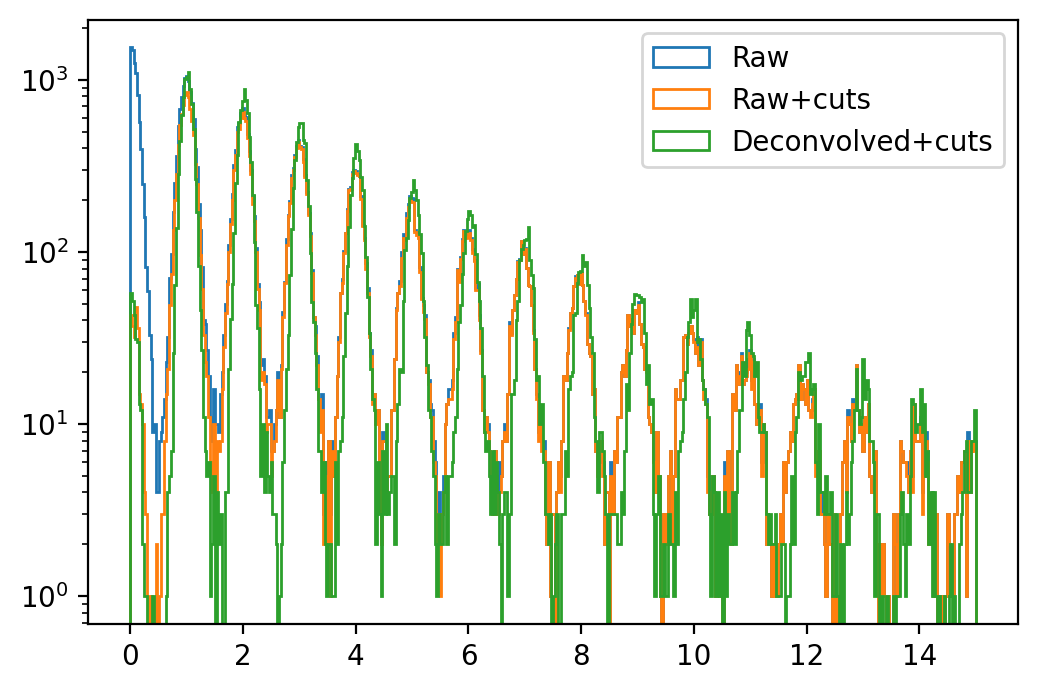

In [115]:
## 12 OV
WEEK="DAPHNE_VUV";
# WEEK="DAPHNE_VIS";
compress=False

OV=12

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")
Light_run=Runs[(Runs["Type"]=="Visible") & ( Runs["OverVoltageXA"]==OV)].iloc[0] #1st run, lower intensity 
Calib_run=Runs[(Runs["Type"]=="Calibration") & ( Runs["OverVoltageXA"]==OV)].iloc[0] #1st run, lower intensity 

Runs=Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]

print(Runs.iloc[1])
print("\n")
print(Light_run)
print("\n")
print(Calib_run)


ADCsxticks2PE=GetGains(WEEK,OV)[-1]

#SER Template:
for ch, run in [(5,26)]:
    run_path=path+"run"+str(run).zfill(2)+"/";
    Average_waveform  =open_ch_var(run_path ,"Avg_wvf"   ,ch,compressed=compress)
    XA_SER=Average_waveform["AvWvf_Center_Peak"]
    
    #remove unphysical pretrigger
    presig=100
    XA_SER=np.concatenate([XA_SER[np.argmax(XA_SER)-presig:],np.zeros(XA_SER[:np.argmax(XA_SER)-presig].shape[0])])
    
    XA_SER/=np.sum(XA_SER[0:1000][XA_SER[0:1000]>0]) #normalize area to 1
    XA_SER*=1/ADCsxticks2PE #normalize area to 1 PE
    XA_SER_FFT  =np.fft.rfft(XA_SER) 
    gauss_F=gauss(np.arange(len(XA_SER_FFT)),sigma=30,n=2);

    if DEBUG:
        print(np.sum(XA_SER[0:1000][XA_SER[0:1000]>0]))
        plt.plot(XA_SER)

#Calibration check:
DEBUG=True
if DEBUG:
    for ch, run in [(5,8)]:
        run_path=path+"run"+str(run).zfill(2)+"/";
        Charge_vars   = open_ch_var(run_path ,"Charge_vars"   ,ch,compressed=compress)
        Peak_vars     = open_ch_var(run_path  ,"Peak_vars"   ,ch,compressed=compress)
        Pedestal_vars = open_ch_var(run_path  ,"Pedestal_vars_SW"   ,ch,compressed=compress)

        plt.figure(dpi=200)
        #plot charge distribution from raw calibration data
        for charge in ["ChargeRangeAverageWvf"]:
            print(charge)
        
            plt.hist(Charge_vars[charge]*ADCsxticks2PE,bins=500,range=(0,15),histtype="step",label="Raw")
            plt.hist(Charge_vars[charge][(Peak_vars["PeakTime"]>950)*(Peak_vars["PeakTime"]<1100)]*ADCsxticks2PE,bins=500,range=(0,15),histtype="step",label="Raw+cuts")

        # Compute same charge distribution from deconvolved data
        RawADC=open_ch_var(run_path,"RawADC",ch,compressed=True)
        ADC=substract_Pedestal((RawADC,Pedestal_vars,1))
        del RawADC
        ADC_dec=deconvolve(ADC,XA_SER,gauss_F)
        del ADC


        Pedestal_vars_SW=compute_Pedestal_slidingWindows(ADC_dec)
        ADC_dec=substract_Pedestal((ADC_dec,Pedestal_vars_SW,1))
        Charge_vars_dec =np.sum(ADC_dec[:,800:1200],axis=1)

        plt.hist(Charge_vars_dec [(Peak_vars["PeakTime"]>950)*(Peak_vars["PeakTime"]<1100)] ,bins=500,range=(0,15),histtype="step",label="Deconvolved+cuts")
        plt.legend()
        plt.semilogy()





ChargeRangeAverageWvf
340.72519697663506


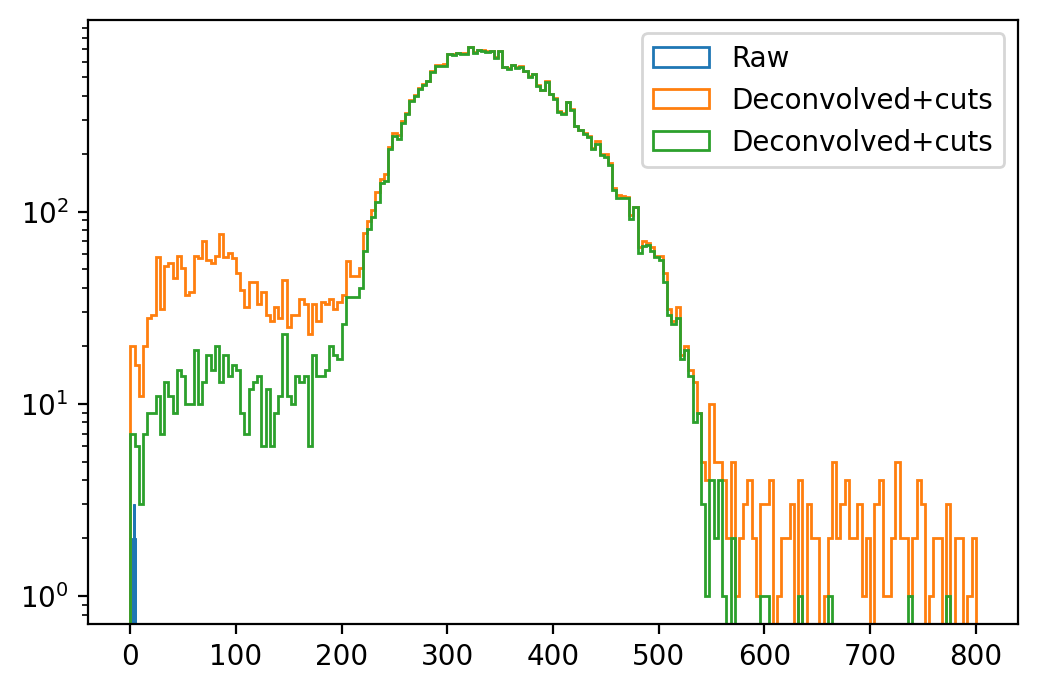

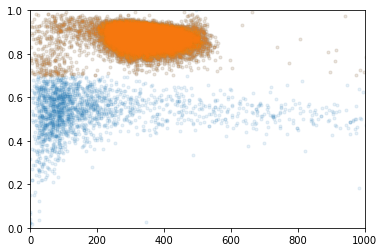

In [116]:
# Alpha source analysis:
for ch, run in [(5,5)]:
    run_path=path+"run"+str(run).zfill(2)+"/";
    Charge_vars   = open_ch_var(run_path ,"Charge_vars"   ,ch,compressed=compress)
    Peak_vars     = open_ch_var(run_path  ,"Peak_vars"   ,ch,compressed=compress)
    Pedestal_vars = open_ch_var(run_path  ,"Pedestal_vars_SW"   ,ch,compressed=compress)

    plt.figure(dpi=200)
    #plot charge distribution from raw calibration data
    for charge in ["ChargeRangeAverageWvf"]:
        print(charge)
    
        plt.hist(Charge_vars[charge]*ADCsxticks2PE,bins=200,range=(0,5),histtype="step",label="Raw")

    # Compute same charge distribution from deconvolved data
    RawADC=open_ch_var(run_path,"RawADC",ch,compressed=True)
    ADC=substract_Pedestal((RawADC,Pedestal_vars,1))
    del RawADC
    ADC_dec=deconvolve(ADC,XA_SER,gauss_F)
    del ADC


    Pedestal_vars_SW=compute_Pedestal_slidingWindows(ADC_dec)
    ADC_dec=substract_Pedestal((ADC_dec,Pedestal_vars_SW,1))
    
    fast  = np.sum(ADC_dec[:,800:1000],axis=1)
    total = np.sum(ADC_dec[:,800:3000],axis=1)


f100=fast/total
f100_cut=(f100>0.7)*(f100<1)


plt.hist(total ,bins=200,range=(0,800),histtype="step",label="Deconvolved+cuts");
plt.hist(total[f100_cut] ,bins=200,range=(0,800),histtype="step",label="Deconvolved+cuts");
plt.legend()
plt.semilogy()

plt.figure()
plt.plot(total,fast/total,".",alpha=0.1)
plt.plot(total[f100_cut],(fast/total)[f100_cut],".",alpha=0.1)
plt.ylim(0,1)
plt.xlim(0,1e3)

print(np.mean(total[f100_cut]))

np.save("Alpha_spectrum_OV_"+str(OV)+".npy",total)


### OV 7

Run                                                              1
Channels                                           [0, 1, 3, 4, 5]
Polarity                        {0: -1, 1: -1, 3: -1, 4: -1, 5: 1}
Type                                                         Alpha
ChannelName         [SiPM289, SiPM290, SiPM377, SiPM378, XARAPUCA]
OverVoltageSiPMs                                                 4
OverVoltageXA                                                    7
Threshold                                                      NaN
Nev                                                          30001
Duration                                                   826.565
Rate                                                        36.296
Date                                           1969-12-31 18:00:45
Name: 1, dtype: object


Run                                                             22
Channels                                           [0, 1, 3, 4, 5]
Polarity                        {0: -

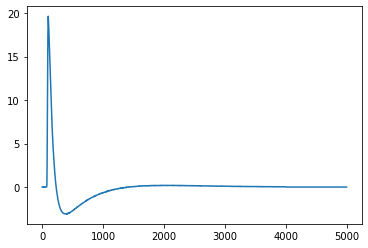

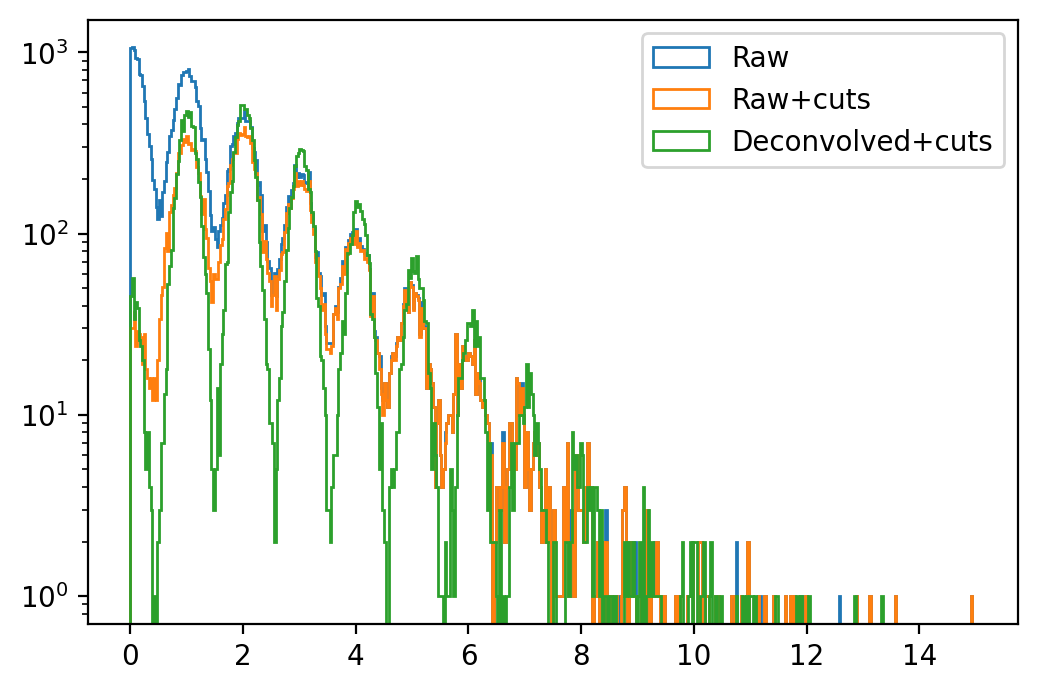

In [117]:
WEEK="DAPHNE_VUV";
# WEEK="DAPHNE_VIS";
compress=False

OV=7

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")
Light_run=Runs[(Runs["Type"]=="Visible") & ( Runs["OverVoltageXA"]==OV)].iloc[0] #1st run, lower intensity 
Calib_run=Runs[(Runs["Type"]=="Calibration") & ( Runs["OverVoltageXA"]==OV)].iloc[0] #1st run, lower intensity 

Runs=Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]

print(Runs.iloc[1])
print("\n")
print(Light_run)
print("\n")
print(Calib_run)


ADCsxticks2PE=GetGains(WEEK,OV)[-1]

#SER Template:
for ch, run in [(5,22)]:
    run_path=path+"run"+str(run).zfill(2)+"/";
    Average_waveform  =open_ch_var(run_path ,"Avg_wvf"   ,ch,compressed=compress)
    XA_SER=Average_waveform["AvWvf_Center_Peak"]
    
    #remove unphysical pretrigger
    presig=100
    XA_SER=np.concatenate([XA_SER[np.argmax(XA_SER)-presig:],np.zeros(XA_SER[:np.argmax(XA_SER)-presig].shape[0])])
    
    XA_SER/=np.sum(XA_SER[0:1000][XA_SER[0:1000]>0]) #normalize area to 1
    XA_SER*=1/ADCsxticks2PE #normalize area to 1 PE
    XA_SER_FFT  =np.fft.rfft(XA_SER) 
    gauss_F=gauss(np.arange(len(XA_SER_FFT)),sigma=30,n=2);

    if DEBUG:
        print(np.sum(XA_SER[0:1000][XA_SER[0:1000]>0]))
        plt.plot(XA_SER)

#Calibration check:
if DEBUG:
    for ch, run in [(5,6)]:
        run_path=path+"run"+str(run).zfill(2)+"/";
        Charge_vars   = open_ch_var(run_path ,"Charge_vars"   ,ch,compressed=compress)
        Peak_vars     = open_ch_var(run_path  ,"Peak_vars"   ,ch,compressed=compress)
        Pedestal_vars = open_ch_var(run_path  ,"Pedestal_vars_SW"   ,ch,compressed=compress)

        plt.figure(dpi=200)
        #plot charge distribution from raw calibration data
        for charge in ["ChargeRangeAverageWvf"]:
            print(charge)
        
            plt.hist(Charge_vars[charge]*ADCsxticks2PE,bins=500,range=(0,15),histtype="step",label="Raw")
            plt.hist(Charge_vars[charge][(Peak_vars["PeakTime"]>950)*(Peak_vars["PeakTime"]<1100)]*ADCsxticks2PE,bins=500,range=(0,15),histtype="step",label="Raw+cuts")

        # Compute same charge distribution from deconvolved data
        RawADC=open_ch_var(run_path,"RawADC",ch,compressed=True)
        ADC=substract_Pedestal((RawADC,Pedestal_vars,1))
        del RawADC
        ADC_dec=deconvolve(ADC,XA_SER,gauss_F)
        del ADC


        Pedestal_vars_SW=compute_Pedestal_slidingWindows(ADC_dec)
        ADC_dec=substract_Pedestal((ADC_dec,Pedestal_vars_SW,1))
        Charge_vars_dec =np.sum(ADC_dec[:,800:1200],axis=1)

        plt.hist(Charge_vars_dec [(Peak_vars["PeakTime"]>950)*(Peak_vars["PeakTime"]<1100)] ,bins=500,range=(0,15),histtype="step",label="Deconvolved+cuts")
        plt.legend()
        plt.semilogy()




ChargeRangeAverageWvf
163.04415004683958


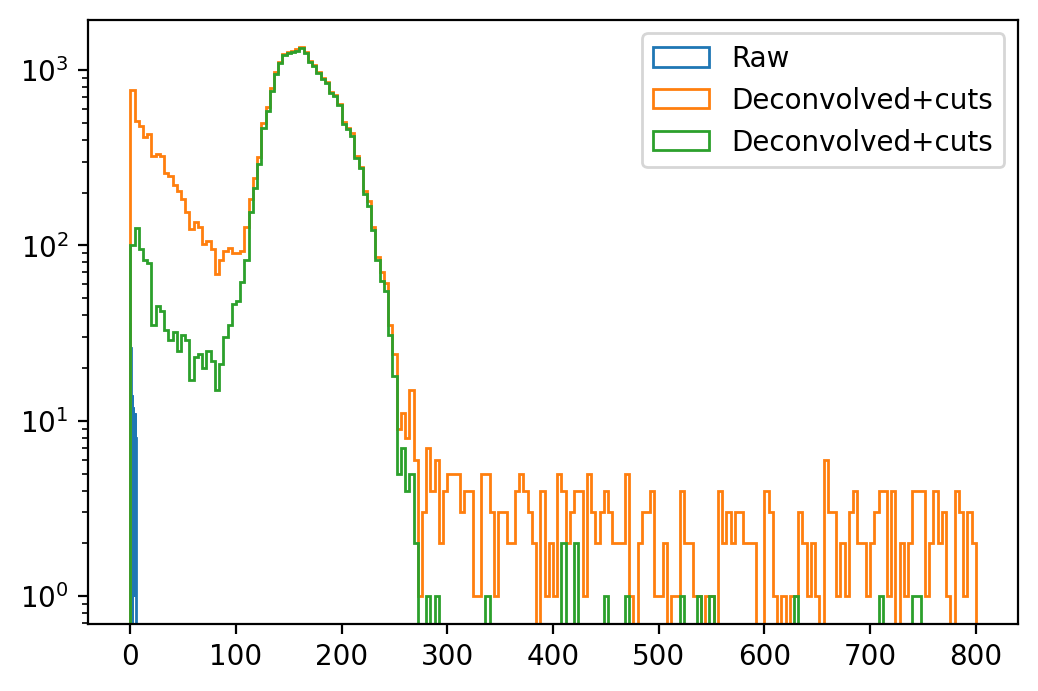

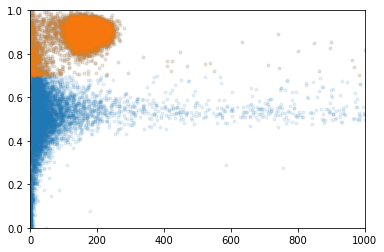

In [16]:
# Alpha source analysis:
for ch, run in [(5,1)]:
    run_path=path+"run"+str(run).zfill(2)+"/";
    Charge_vars   = open_ch_var(run_path ,"Charge_vars"   ,ch,compressed=compress)
    Peak_vars     = open_ch_var(run_path  ,"Peak_vars"   ,ch,compressed=compress)
    Pedestal_vars = open_ch_var(run_path  ,"Pedestal_vars_SW"   ,ch,compressed=compress)

    plt.figure(dpi=200)
    #plot charge distribution from raw calibration data
    for charge in ["ChargeRangeAverageWvf"]:
        print(charge)
    
        plt.hist(Charge_vars[charge]*ADCsxticks2PE,bins=200,range=(0,5),histtype="step",label="Raw")

    # Compute same charge distribution from deconvolved data
    RawADC=open_ch_var(run_path,"RawADC",ch,compressed=True)
    ADC=substract_Pedestal((RawADC,Pedestal_vars,1))
    del RawADC
    ADC_dec=deconvolve(ADC,XA_SER,gauss_F)
    del ADC


    Pedestal_vars_SW=compute_Pedestal_slidingWindows(ADC_dec)
    ADC_dec=substract_Pedestal((ADC_dec,Pedestal_vars_SW,1))
    
    fast  = np.sum(ADC_dec[:,700:1000],axis=1)
    total = np.sum(ADC_dec[:,700:3000],axis=1)


f100=fast/total
f100_cut=(f100>0.7)*(f100<1)


plt.hist(total ,bins=200,range=(0,800),histtype="step",label="Deconvolved+cuts");
plt.hist(total[f100_cut] ,bins=200,range=(0,800),histtype="step",label="Deconvolved+cuts");
plt.legend()
plt.semilogy()

plt.figure()
plt.plot(total,fast/total,".",alpha=0.1)
plt.plot(total[f100_cut],(fast/total)[f100_cut],".",alpha=0.1)
plt.ylim(0,1)
plt.xlim(0,1e3)

print(np.mean(total[f100_cut]))

np.save("Alpha_spectrum_OV_"+str(OV)+".npy",total)


163.04415004683958


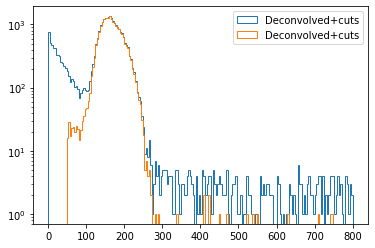

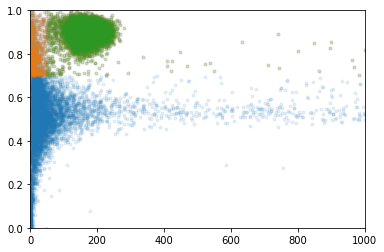

In [17]:

f100=fast/total
f100_cut=(f100>0.7)*(f100<1)
total_cut=total>50

plt.hist(total ,bins=200,range=(0,800),histtype="step",label="Deconvolved+cuts");
plt.hist(total[f100_cut*total_cut] ,bins=200,range=(0,800),histtype="step",label="Deconvolved+cuts");
plt.legend()
plt.semilogy()

plt.figure()
plt.plot(total,fast/total,".",alpha=0.1)
plt.plot(total[f100_cut],(fast/total)[f100_cut],".",alpha=0.1)
plt.plot(total[f100_cut*total_cut],(fast/total)[f100_cut*total_cut],".",alpha=0.1)
plt.ylim(0,1)
plt.xlim(0,1e3)

print(np.mean(total[f100_cut]))



## Apsaia VUV

### 3 OV

In [2]:
WEEK="APSAIA_VUV_2";
# WEEK="DAPHNE_VIS";
compress=False

OV=3

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")
Light_run=Runs[(Runs["Type"]=="Visible") & ( Runs["OverVoltageXA"]==OV)].iloc[0] #1st run, lower intensity 
Calib_run=Runs[(Runs["Type"]=="Calibration") & ( Runs["OverVoltageXA"]==OV)].iloc[0] #1st run, lower intensity 

Runs=Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]

print(Runs.iloc[1])
print("\n")
print(Light_run)
print("\n")
print(Calib_run)
800


Run                                                              5
Channels                                           [0, 1, 3, 4, 5]
Polarity                        {0: -1, 1: -1, 3: -1, 4: -1, 5: 1}
Type                                                         Alpha
ChannelName         [SiPM289, SiPM290, SiPM377, SiPM378, XARAPUCA]
OverVoltageSiPMs                                                 4
OverVoltageXA                                                    3
Threshold                                                      NaN
Nev                                                          30001
Duration                                                   988.186
Rate                                                       30.3597
Date                                           1969-12-31 18:00:45
Name: 5, dtype: object


Run                                                             26
Channels                                           [0, 1, 3, 4, 5]
Polarity                        {0: -

800

1210.3433454911888
ChargeRangeAverageWvf
ChargeRangeAverageWvf
255.62280015926697
256.80547306308756
272.0723481628219


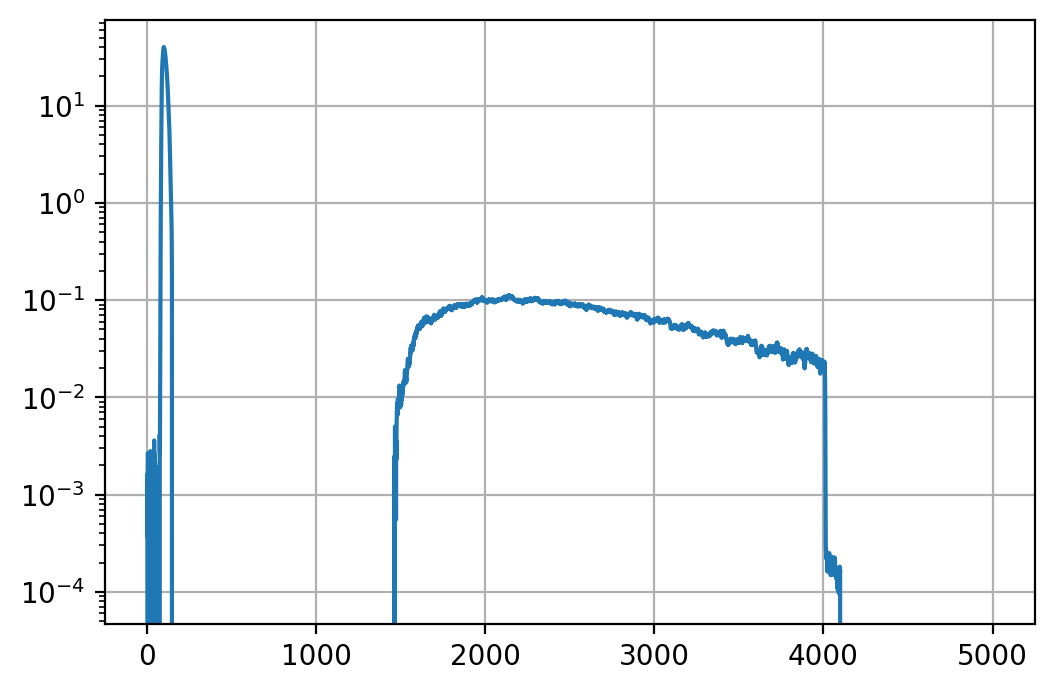

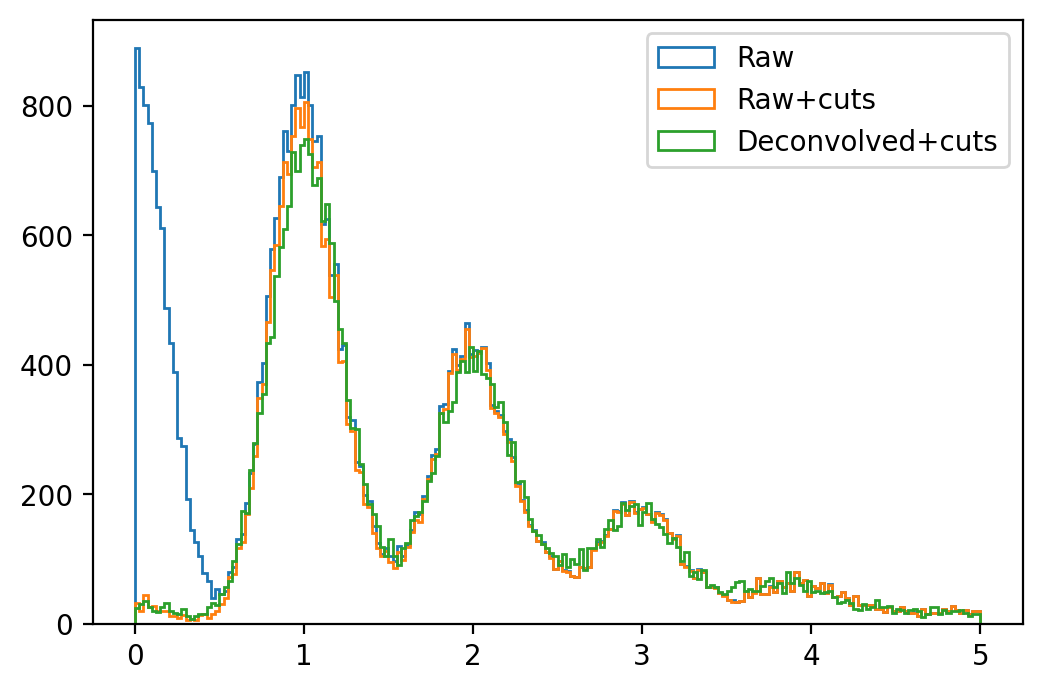

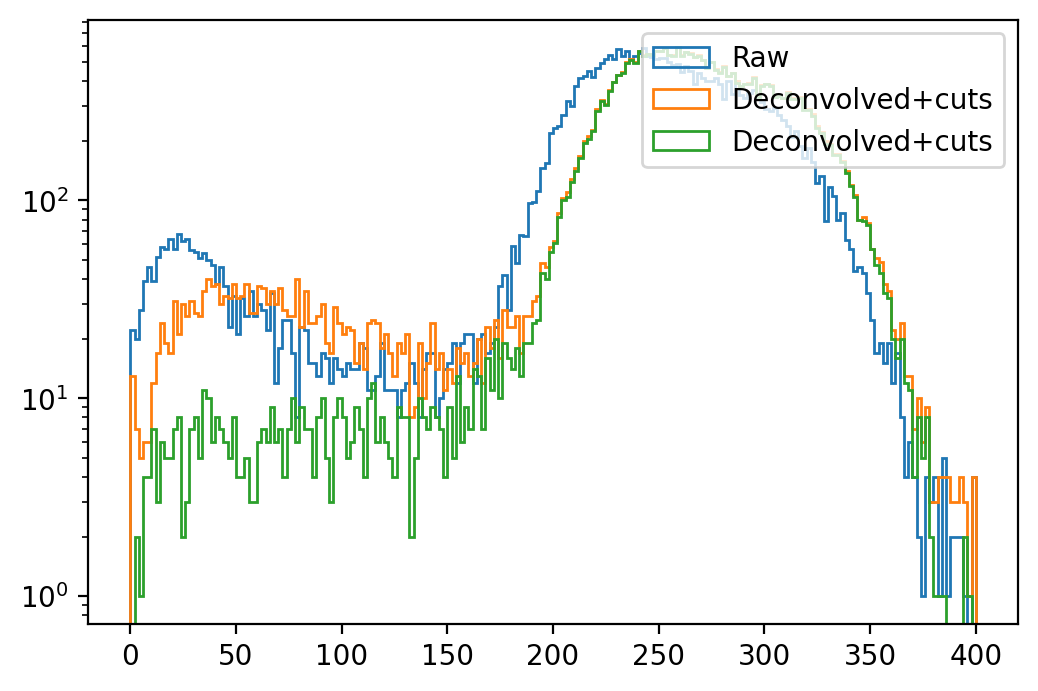

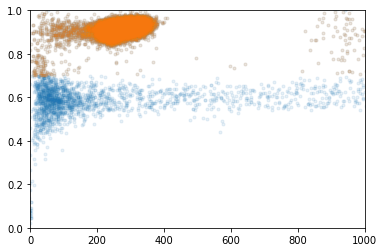

In [78]:
ADCsxticks2PE=GetGains(WEEK,OV)[-1]

#SER Template:
for ch, run in [(5,24)]:
    run_path=path+"run"+str(run).zfill(2)+"/";
    Average_waveform  =open_ch_var(run_path ,"Avg_wvf"   ,ch,compressed=compress)
    XA_SER=raw_av_wvfs["AvWvf_Center_Peak"]
    XA_SER=Average_waveform["AvWvf_Center_Peak"]
    
    #remove unphysical pretrigger
    presig=100
    XA_SER=np.concatenate([XA_SER[np.argmax(XA_SER)-presig:],np.zeros(XA_SER[:np.argmax(XA_SER)-presig].shape[0])])
    
    XA_SER*=1/ADCsxticks2PE #normalize area to 1 PE
    XA_SER/=np.sum(XA_SER[0:500][XA_SER[0:500]>0]) #normalize area to 1
    
    # Amplitude normalization
    XA_SER*=40/np.max(XA_SER) #normalize area to 1 PE
    
    XA_SER_FFT  =np.fft.rfft(XA_SER)
    gauss_F=gauss(np.arange(len(XA_SER_FFT)),sigma=50,n=2);

    if DEBUG:
        print(np.sum(XA_SER[0:500][XA_SER[0:500]>0]))
        plt.figure(dpi=200)
        plt.plot(XA_SER)
        plt.grid()
        plt.semilogy()

DEBUG=True
#Calibration check:
if DEBUG:
    for ch, run in [(5,8)]:
        run_path=path+"run"+str(run).zfill(2)+"/";
        Charge_vars   = open_ch_var(run_path ,"Charge_vars"   ,ch,compressed=compress)
        Peak_vars     = open_ch_var(run_path  ,"Peak_vars"   ,ch,compressed=compress)
        Pedestal_vars = open_ch_var(run_path  ,"Pedestal_vars_SW"   ,ch,compressed=compress)

        plt.figure(dpi=200)
        #plot charge distribution from raw calibration data
        for charge in ["ChargeRangeAverageWvf"]:
            print(charge)
        
            plt.hist(Charge_vars[charge]*ADCsxticks2PE,bins=200,range=(0,5),histtype="step",label="Raw")
            plt.hist(Charge_vars[charge][(Peak_vars["PeakTime"]>950)*(Peak_vars["PeakTime"]<1100)]*ADCsxticks2PE,bins=200,range=(0,5),histtype="step",label="Raw+cuts")

        # Compute same charge distribution from deconvolved data
        RawADC=open_ch_var(run_path,"RawADC",ch,compressed=True)
        ADC=substract_Pedestal((RawADC,Pedestal_vars,1))
        del RawADC
        ADC_dec=deconvolve(ADC,XA_SER,gauss_F)


        Pedestal_vars_SW=compute_Pedestal_slidingWindows(ADC_dec)
        ADC_dec=substract_Pedestal((ADC_dec,Pedestal_vars_SW,1))
        Charge_vars_dec =np.sum(ADC_dec[:,850:1150],axis=1)

        plt.hist(Charge_vars_dec [(Peak_vars["PeakTime"]>950)*(Peak_vars["PeakTime"]<1100)] ,bins=200,range=(0,5),histtype="step",label="Deconvolved+cuts")
        plt.legend()


# Alpha source analysis:
for ch, run in [(5,5)]:
    run_path=path+"run"+str(run).zfill(2)+"/";
    Charge_vars   = open_ch_var(run_path ,"Charge_vars"   ,ch,compressed=compress)
    Peak_vars     = open_ch_var(run_path  ,"Peak_vars"   ,ch,compressed=compress)
    Pedestal_vars = open_ch_var(run_path  ,"Pedestal_vars_SW"   ,ch,compressed=compress)

    plt.figure(dpi=200)
    #plot charge distribution from raw calibration data
    for charge in ["ChargeRangeAverageWvf"]:
        print(charge)
    
        plt.hist(Charge_vars[charge]*ADCsxticks2PE,bins=200,range=(0,400),histtype="step",label="Raw")

        print(np.mean(Charge_vars[charge]*ADCsxticks2PE))
    # Compute same charge distribution from deconvolved data
    RawADC=open_ch_var(run_path,"RawADC",ch,compressed=True)
    ADC=substract_Pedestal((RawADC,Pedestal_vars,1))
    del RawADC
    ADC_dec=deconvolve(ADC,XA_SER,gauss_F)


    Pedestal_vars_SW=compute_Pedestal_slidingWindows(ADC_dec)
    ADC_dec=substract_Pedestal((ADC_dec,Pedestal_vars_SW,1))
    
    fast  = np.sum(ADC_dec[:,700:1000],axis=1)
    total = np.sum(ADC_dec[:,700:3000],axis=1)


f100=fast/total
f100_cut=(f100>0.7)*(f100<1)
print(np.mean(fast))


plt.hist(total ,bins=200,range=(0,400),histtype="step",label="Deconvolved+cuts");
plt.hist(total[f100_cut] ,bins=200,range=(0,400),histtype="step",label="Deconvolved+cuts");
plt.legend()
plt.semilogy()

plt.figure()
plt.plot(total,fast/total,".",alpha=0.1)
plt.plot(total[f100_cut],(fast/total)[f100_cut],".",alpha=0.1)
plt.ylim(0,1)
plt.xlim(0,1e3)

print(np.mean(total[f100_cut]))

np.save("Alpha_spectrum_OV_"+str(OV)+"_WEEK_"+WEEK+".npy",total)


### 2.5 OV

Run                                                              3
Channels                                           [0, 1, 3, 4, 5]
Polarity                        {0: -1, 1: -1, 3: -1, 4: -1, 5: 1}
Type                                                         Alpha
ChannelName         [SiPM289, SiPM290, SiPM377, SiPM378, XARAPUCA]
OverVoltageSiPMs                                                 4
OverVoltageXA                                                  2.5
Threshold                                                      NaN
Nev                                                          30001
Duration                                                   988.504
Rate                                                       30.3499
Date                                           1969-12-31 18:00:45
Name: 3, dtype: object


Run                                                             24
Channels                                           [0, 1, 3, 4, 5]
Polarity                        {0: -

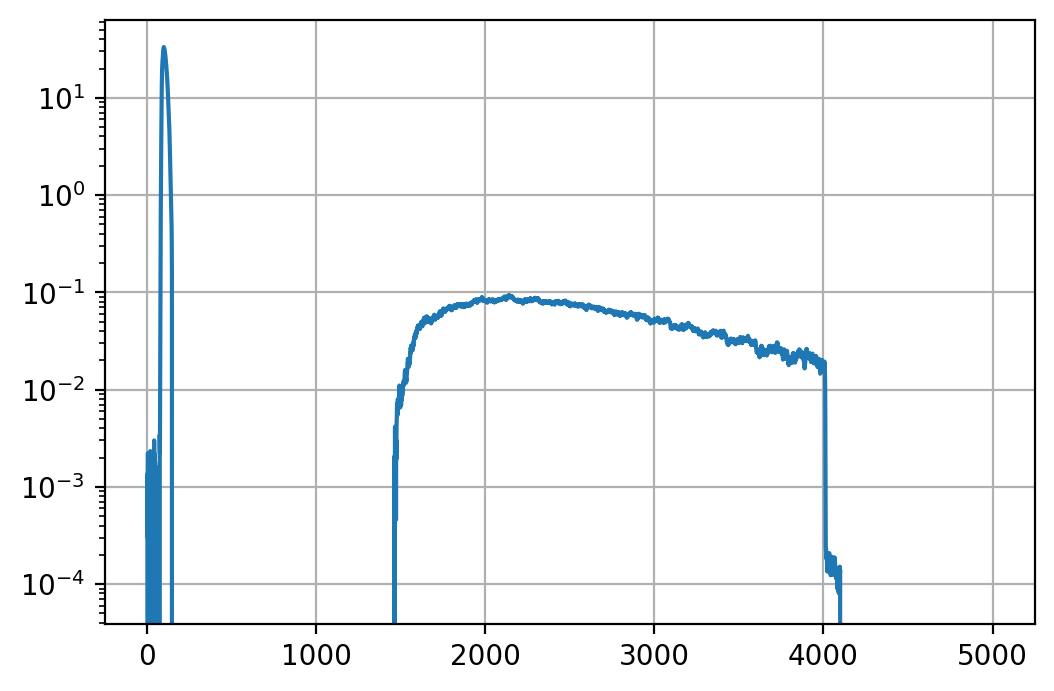

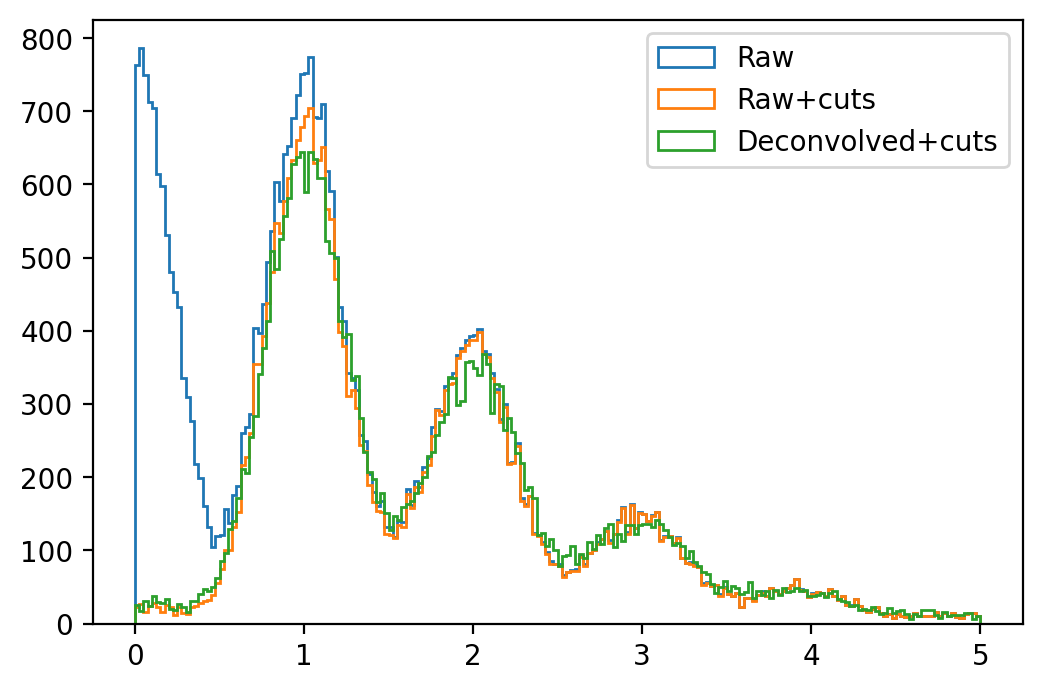

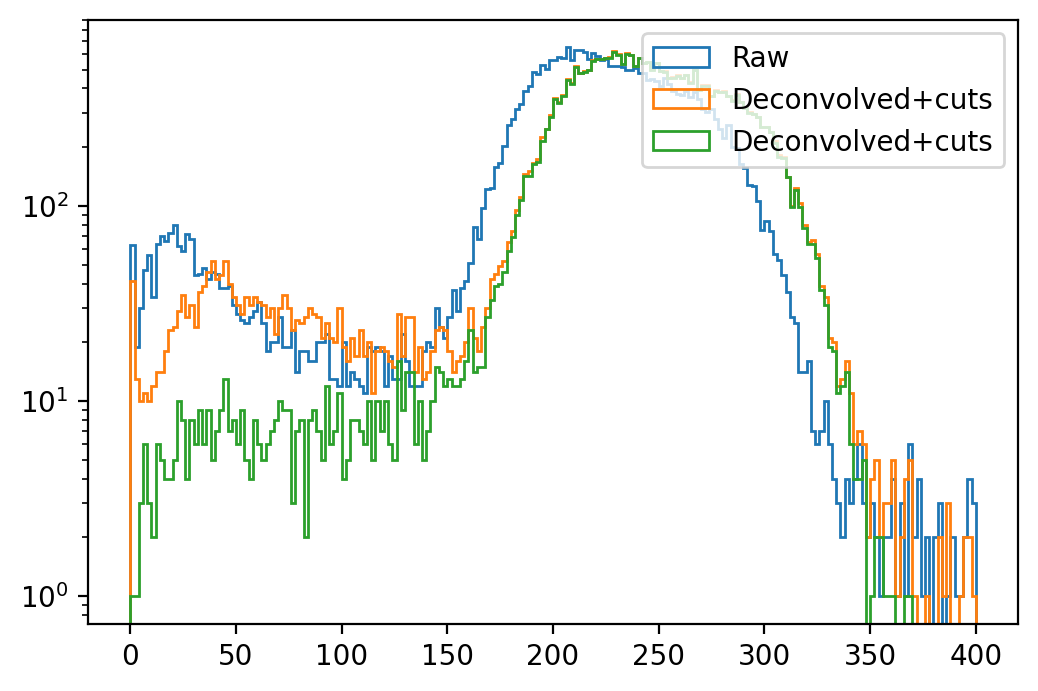

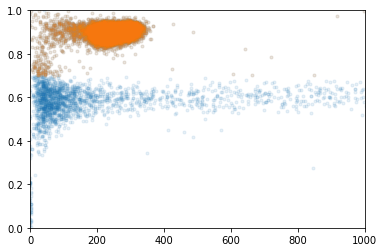

In [94]:
WEEK="APSAIA_VUV_2";
# WEEK="DAPHNE_VIS";
compress=False

OV=2.5

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")
Light_run=Runs[(Runs["Type"]=="Visible") & ( Runs["OverVoltageXA"]==OV)].iloc[0] #1st run, lower intensity 
Calib_run=Runs[(Runs["Type"]=="Calibration") & ( Runs["OverVoltageXA"]==OV)].iloc[0] #1st run, lower intensity 

Runs=Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]

print(Runs.iloc[1])
print("\n")
print(Light_run)
print("\n")
print(Calib_run)
800

ADCsxticks2PE=GetGains(WEEK,OV)[-1]

#SER Template:
for ch, run in [(5,24)]:
    run_path=path+"run"+str(run).zfill(2)+"/";
    Average_waveform  =open_ch_var(run_path ,"Avg_wvf"   ,ch,compressed=compress)
    XA_SER=raw_av_wvfs["AvWvf_Center_Peak"]
    XA_SER=Average_waveform["AvWvf_Center_Peak"]
    
    #remove unphysical pretrigger
    presig=100
    XA_SER=np.concatenate([XA_SER[np.argmax(XA_SER)-presig:],np.zeros(XA_SER[:np.argmax(XA_SER)-presig].shape[0])])
    
    XA_SER/=np.sum(XA_SER[0:500][XA_SER[0:500]>0])   
    
    #Charge normalization
    # XA_SER*=1/ADCsxticks2PE #normalize area to 1
    
    # Amplitude normalization
    XA_SER*=40/np.max(XA_SER) /(GetGains(WEEK,2.5)[-1] / (GetGains(WEEK,3)[-1]))# normalize area to 1, 40 is the SPE amplitude for 3 V, we reescale for lower values
    
    XA_SER_FFT  =np.fft.rfft(XA_SER)
    gauss_F=gauss(np.arange(len(XA_SER_FFT)),sigma=50,n=2);

    if DEBUG:
        print(np.sum(XA_SER[0:500][XA_SER[0:500]>0]))
        plt.figure(dpi=200)
        plt.plot(XA_SER)
        plt.grid()
        plt.semilogy()

DEBUG=True
#Calibration check:
if DEBUG:
    for ch, run in [(5,7)]:
        run_path=path+"run"+str(run).zfill(2)+"/";
        Charge_vars   = open_ch_var(run_path ,"Charge_vars"   ,ch,compressed=compress)
        Peak_vars     = open_ch_var(run_path  ,"Peak_vars"   ,ch,compressed=compress)
        Pedestal_vars = open_ch_var(run_path  ,"Pedestal_vars_SW"   ,ch,compressed=compress)

        plt.figure(dpi=200)
        #plot charge distribution from raw calibration data
        for charge in ["ChargeRangeAverageWvf"]:
            print(charge)
        
            plt.hist(Charge_vars[charge]*ADCsxticks2PE,bins=200,range=(0,5),histtype="step",label="Raw")
            plt.hist(Charge_vars[charge][(Peak_vars["PeakTime"]>950)*(Peak_vars["PeakTime"]<1100)]*ADCsxticks2PE,bins=200,range=(0,5),histtype="step",label="Raw+cuts")

        # Compute same charge distribution from deconvolved data
        RawADC=open_ch_var(run_path,"RawADC",ch,compressed=True)
        ADC=substract_Pedestal((RawADC,Pedestal_vars,1))
        del RawADC
        ADC_dec=deconvolve(ADC,XA_SER,gauss_F)


        Pedestal_vars_SW=compute_Pedestal_slidingWindows(ADC_dec)
        ADC_dec=substract_Pedestal((ADC_dec,Pedestal_vars_SW,1))
        Charge_vars_dec =np.sum(ADC_dec[:,850:1150],axis=1)

        plt.hist(Charge_vars_dec [(Peak_vars["PeakTime"]>950)*(Peak_vars["PeakTime"]<1100)] ,bins=200,range=(0,5),histtype="step",label="Deconvolved+cuts")
        plt.legend()


# Alpha source analysis:
for ch, run in [(5,3)]:
    run_path=path+"run"+str(run).zfill(2)+"/";
    Charge_vars   = open_ch_var(run_path ,"Charge_vars"   ,ch,compressed=compress)
    Peak_vars     = open_ch_var(run_path  ,"Peak_vars"   ,ch,compressed=compress)
    Pedestal_vars = open_ch_var(run_path  ,"Pedestal_vars_SW"   ,ch,compressed=compress)

    plt.figure(dpi=200)
    #plot charge distribution from raw calibration data
    for charge in ["ChargeRangeAverageWvf"]:
        print(charge)
    
        plt.hist(Charge_vars[charge]*ADCsxticks2PE,bins=200,range=(0,400),histtype="step",label="Raw")

        print(np.mean(Charge_vars[charge]*ADCsxticks2PE))
    # Compute same charge distribution from deconvolved data
    RawADC=open_ch_var(run_path,"RawADC",ch,compressed=True)
    ADC=substract_Pedestal((RawADC,Pedestal_vars,1))
    del RawADC
    ADC_dec=deconvolve(ADC,XA_SER,gauss_F)


    Pedestal_vars_SW=compute_Pedestal_slidingWindows(ADC_dec)
    ADC_dec=substract_Pedestal((ADC_dec,Pedestal_vars_SW,1))
    
    fast  = np.sum(ADC_dec[:,700:1000],axis=1)
    total = np.sum(ADC_dec[:,700:3000],axis=1)


f100=fast/total
f100_cut=(f100>0.7)*(f100<1)
print(np.mean(fast))


plt.hist(total ,bins=200,range=(0,400),histtype="step",label="Deconvolved+cuts");
plt.hist(total[f100_cut] ,bins=200,range=(0,400),histtype="step",label="Deconvolved+cuts");
plt.legend()
plt.semilogy()

plt.figure()
plt.plot(total,fast/total,".",alpha=0.1)
plt.plot(total[f100_cut],(fast/total)[f100_cut],".",alpha=0.1)
plt.ylim(0,1)
plt.xlim(0,1e3)

print(np.mean(total[f100_cut]))

np.save("Alpha_spectrum_OV_"+str(OV)+"_WEEK_"+WEEK+".npy",total)


### OV 2

Run                                                              1
Channels                                           [0, 1, 3, 4, 5]
Polarity                        {0: -1, 1: -1, 3: -1, 4: -1, 5: 1}
Type                                                         Alpha
ChannelName         [SiPM289, SiPM290, SiPM377, SiPM378, XARAPUCA]
OverVoltageSiPMs                                                 4
OverVoltageXA                                                    2
Threshold                                                      NaN
Nev                                                          30001
Duration                                                   826.565
Rate                                                        36.296
Date                                           1969-12-31 18:00:45
Name: 1, dtype: object


Run                                                             22
Channels                                           [0, 1, 3, 4, 5]
Polarity                        {0: -

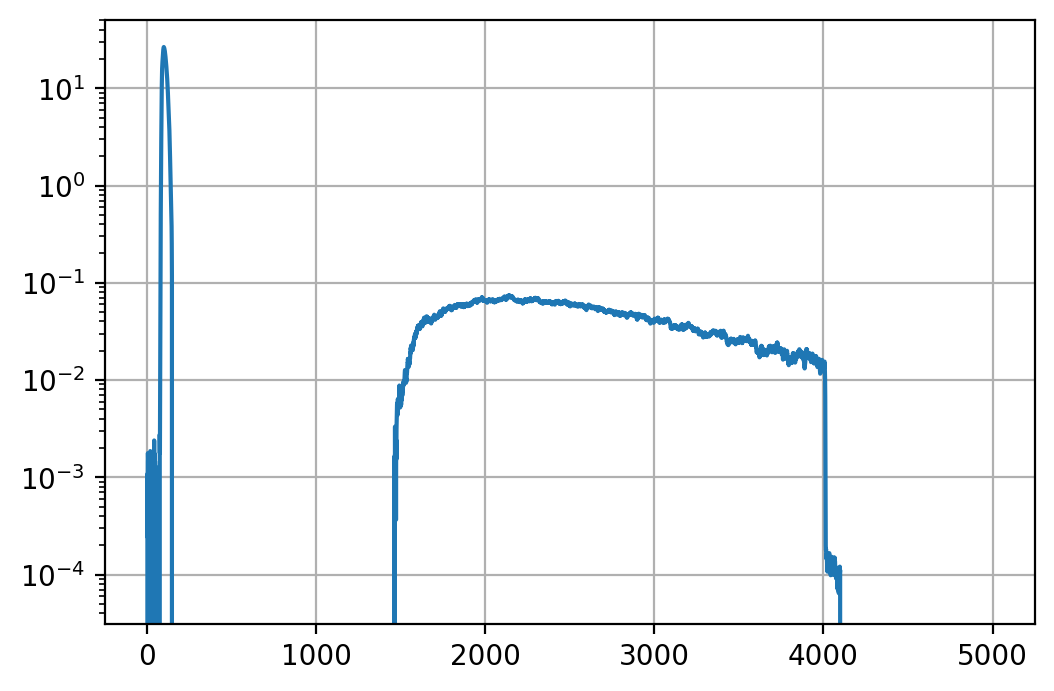

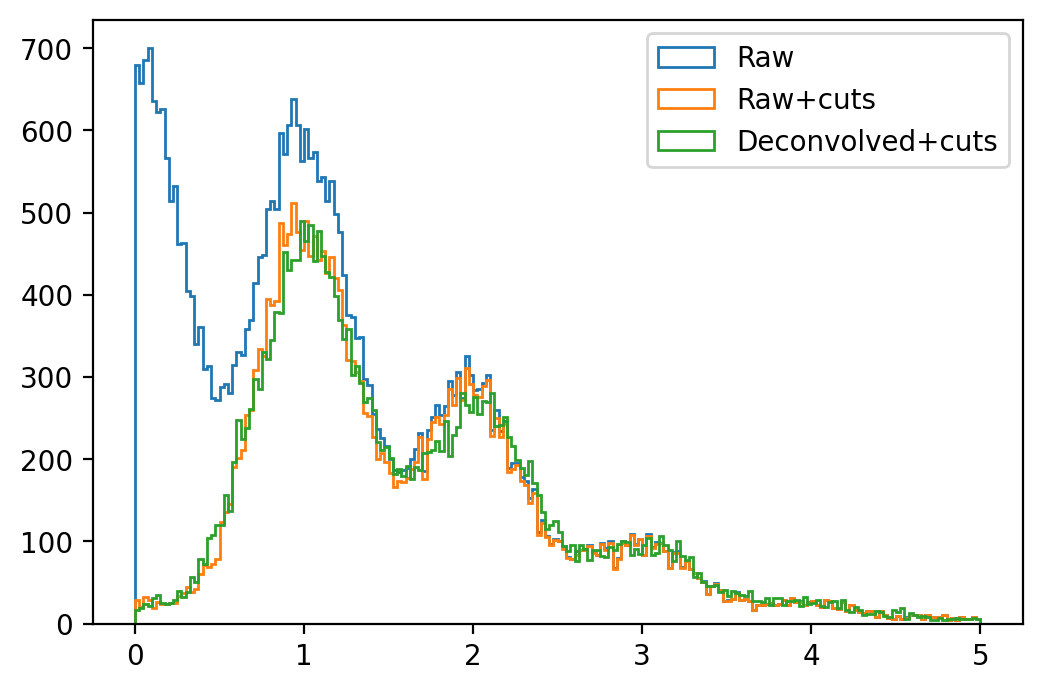

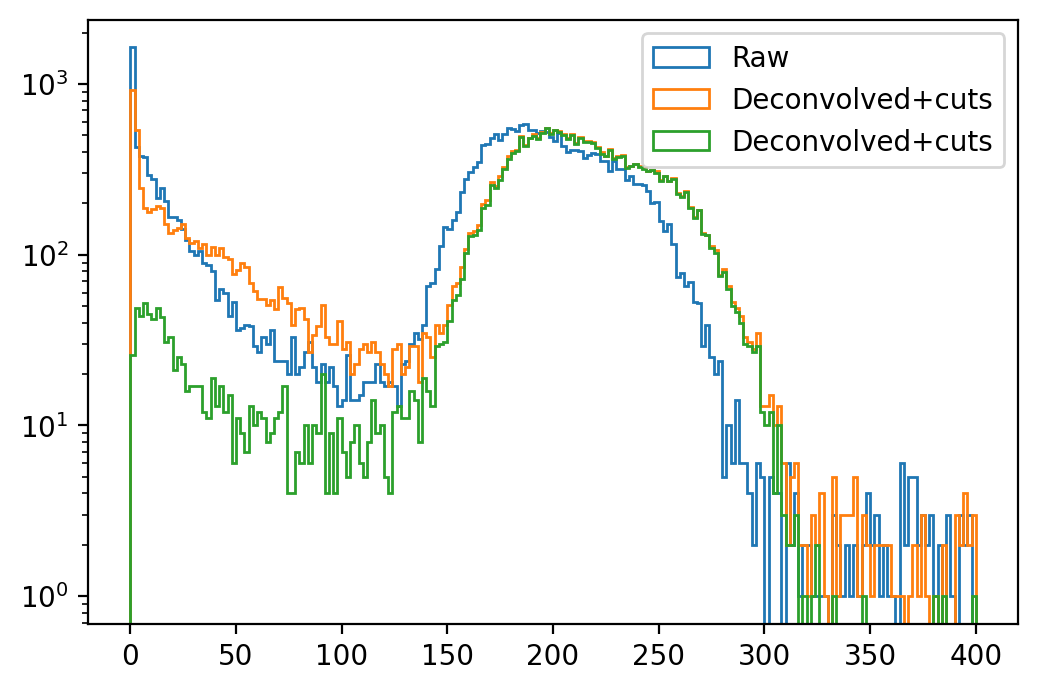

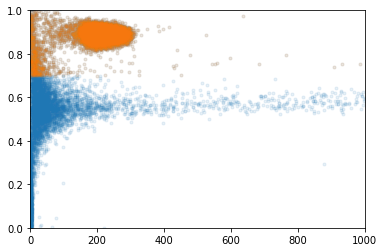

In [96]:
### 2.5 OV
WEEK="APSAIA_VUV_2";
# WEEK="DAPHNE_VIS";
compress=False

OV=2

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")
Light_run=Runs[(Runs["Type"]=="Visible") & ( Runs["OverVoltageXA"]==OV)].iloc[0] #1st run, lower intensity 
Calib_run=Runs[(Runs["Type"]=="Calibration") & ( Runs["OverVoltageXA"]==OV)].iloc[0] #1st run, lower intensity 

Runs=Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]

print(Runs.iloc[1])
print("\n")
print(Light_run)
print("\n")
print(Calib_run)
800

ADCsxticks2PE=GetGains(WEEK,OV)[-1]

#SER Template:
for ch, run in [(5,24)]:
    run_path=path+"run"+str(run).zfill(2)+"/";
    Average_waveform  =open_ch_var(run_path ,"Avg_wvf"   ,ch,compressed=compress)
    XA_SER=raw_av_wvfs["AvWvf_Center_Peak"]
    XA_SER=Average_waveform["AvWvf_Center_Peak"]
    
    #remove unphysical pretrigger
    presig=100
    XA_SER=np.concatenate([XA_SER[np.argmax(XA_SER)-presig:],np.zeros(XA_SER[:np.argmax(XA_SER)-presig].shape[0])])
    
    XA_SER/=np.sum(XA_SER[0:500][XA_SER[0:500]>0])   
    
    #Charge normalization
    # XA_SER*=1/ADCsxticks2PE #normalize area to 1
    
    # Amplitude normalization
    XA_SER*=40/np.max(XA_SER) /(GetGains(WEEK,2)[-1] / (GetGains(WEEK,3)[-1]))# normalize area to 1, 40 is the SPE amplitude for 3 V, we reescale for lower values
    
    XA_SER_FFT  =np.fft.rfft(XA_SER)
    gauss_F=gauss(np.arange(len(XA_SER_FFT)),sigma=50,n=2);

    if DEBUG:
        print(np.sum(XA_SER[0:500][XA_SER[0:500]>0]))
        plt.figure(dpi=200)
        plt.plot(XA_SER)
        plt.grid()
        plt.semilogy()

DEBUG=True
#Calibration check:
if DEBUG:
    for ch, run in [(5,6)]:
        run_path=path+"run"+str(run).zfill(2)+"/";
        Charge_vars   = open_ch_var(run_path ,"Charge_vars"   ,ch,compressed=compress)
        Peak_vars     = open_ch_var(run_path  ,"Peak_vars"   ,ch,compressed=compress)
        Pedestal_vars = open_ch_var(run_path  ,"Pedestal_vars_SW"   ,ch,compressed=compress)

        plt.figure(dpi=200)
        #plot charge distribution from raw calibration data
        for charge in ["ChargeRangeAverageWvf"]:
            print(charge)
        
            plt.hist(Charge_vars[charge]*ADCsxticks2PE,bins=200,range=(0,5),histtype="step",label="Raw")
            plt.hist(Charge_vars[charge][(Peak_vars["PeakTime"]>950)*(Peak_vars["PeakTime"]<1100)]*ADCsxticks2PE,bins=200,range=(0,5),histtype="step",label="Raw+cuts")

        # Compute same charge distribution from deconvolved data
        RawADC=open_ch_var(run_path,"RawADC",ch,compressed=True)
        ADC=substract_Pedestal((RawADC,Pedestal_vars,1))
        del RawADC
        ADC_dec=deconvolve(ADC,XA_SER,gauss_F)


        Pedestal_vars_SW=compute_Pedestal_slidingWindows(ADC_dec)
        ADC_dec=substract_Pedestal((ADC_dec,Pedestal_vars_SW,1))
        Charge_vars_dec =np.sum(ADC_dec[:,850:1150],axis=1)

        plt.hist(Charge_vars_dec [(Peak_vars["PeakTime"]>950)*(Peak_vars["PeakTime"]<1100)] ,bins=200,range=(0,5),histtype="step",label="Deconvolved+cuts")
        plt.legend()


# Alpha source analysis:
for ch, run in [(5,1)]:
    run_path=path+"run"+str(run).zfill(2)+"/";
    Charge_vars   = open_ch_var(run_path ,"Charge_vars"   ,ch,compressed=compress)
    Peak_vars     = open_ch_var(run_path  ,"Peak_vars"   ,ch,compressed=compress)
    Pedestal_vars = open_ch_var(run_path  ,"Pedestal_vars_SW"   ,ch,compressed=compress)

    plt.figure(dpi=200)
    #plot charge distribution from raw calibration data
    for charge in ["ChargeRangeAverageWvf"]:
        print(charge)
    
        plt.hist(Charge_vars[charge]*ADCsxticks2PE,bins=200,range=(0,400),histtype="step",label="Raw")

    # Compute same charge distribution from deconvolved data
    RawADC=open_ch_var(run_path,"RawADC",ch,compressed=True)
    ADC=substract_Pedestal((RawADC,Pedestal_vars,1))
    del RawADC
    ADC_dec=deconvolve(ADC,XA_SER,gauss_F)


    Pedestal_vars_SW=compute_Pedestal_slidingWindows(ADC_dec)
    ADC_dec=substract_Pedestal((ADC_dec,Pedestal_vars_SW,1))
    
    fast  = np.sum(ADC_dec[:,700:1000],axis=1)
    total = np.sum(ADC_dec[:,700:3000],axis=1)


f100=fast/total
f100_cut=(f100>0.7)*(f100<1)
ftotal_cut=(total>50)*(total<600)

# print(np.mean(fast))


plt.hist(total ,bins=200,range=(0,400),histtype="step",label="Deconvolved+cuts");
plt.hist(total[f100_cut] ,bins=200,range=(0,400),histtype="step",label="Deconvolved+cuts");
plt.legend()
plt.semilogy()

plt.figure()
plt.plot(total,fast/total,".",alpha=0.1)
plt.plot(total[f100_cut],(fast/total)[f100_cut],".",alpha=0.1)
plt.ylim(0,1)
plt.xlim(0,1e3)

print(np.mean(Charge_vars[charge][f100_cut*ftotal_cut]*ADCsxticks2PE))
print(np.mean(total[f100_cut*ftotal_cut]))

np.save("Alpha_spectrum_OV_"+str(OV)+"_WEEK_"+WEEK+".npy",total)


# Alpha source analysis:

[]

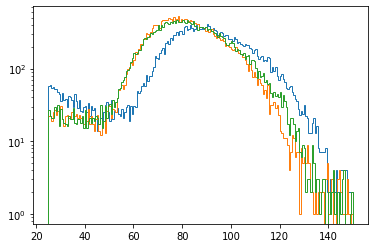

In [26]:
for OV in [7,9,12]:
    spectra=np.load("Alpha_spectrum_OV_"+str(OV)+".npy")
    spectra=spectra[spectra>(np.mean(spectra)-np.std(spectra))]
    plt.hist(spectra*100/np.mean(spectra),bins=200,range=(25,150),histtype="step",label="Deconvolved+cuts");
    
plt.semilogy()